In [ ]:
# mount your Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# change current working directory
import os
os.chdir('/content/drive/MyDrive/ML/1CWK50-ML/1CWK50-ML/')

In [ ]:
# check we can see the datasets

# datasets that are useful for testing classifiers
os.path.isfile('moons.csv')
os.path.isfile('iris.csv')
os.path.isfile('biopsies.csv')

# datasets that are useful for testing regressors
os.path.isfile('sepal_regression.csv')
os.path.isfile('iris_regression.csv')
os.path.isfile('concrete.csv')

True

# Quick overview
<<<**Optional text goes here**: You can leave this section blank if you want to. But it might be helpful to give a me a very quick overview of what you've worked on inside this notebook. It's fine to mention things that didn't work out, or broke, or didn't quite end up as you hoped. This can help me understand what's going on when I'm marking.>>>

# Predictive model(s)

## My implementation (KNN)



This section should include a class that implements a predictive model (either a classifier or a regressor). It will typically be a class with a summary code comment at the top, explaining how the model works, a constructor (which might support some hyperparameters), a `fit()` method, a `predict_one()` method and a `predict()` method. The code inside the class should be appropriately commented. See also the marking criteria.

<<<**Optional text goes here**: You can leave this section blank if you want to. But it might be helpful to at least mention the name of the predictive model that you're implementing, and anything else you want me to know when I'm marking.>>>

In [ ]:
# Class summary comment:
#MyKnn_Classifier is a classifier that implements the KNN model.
#It has a hyperparameter k to control the number of nearest data points that we will consider in our prediction.
#Then, the "fit" method puts the training examples and labels into the classifier. The model looks at each example feature and the correlated labels.
#The class or value of the new data point is then determined by majority voting (for classification) among its k nearest neighbours.
#The predict_method makes a prediction of a specific data example that we chose
# The predict method loops all the data examples and returns the predicted labels


# Class code:
# import library
import numpy as np

#Create the MyKnn_Classifier to implement KNN
# MyKnn_Classifier is a classifier that implements the KNN model.
class MyKnn_Classifier:
  # The class constructor, set up to implement the k-NN
    def __init__(self,  k):
        # Check whether k is a positive integer to make sure the program runs correctly

        if k<1:
          raise ValueError('k should be larger or equal to 1. You cannot predict a data point in KNN without considering any nearby data points.')
        elif type(k) != int:
          raise ValueError('k should be an integer.')
        else:
          self.k=k

    # The method we call to fit the model to training data
    # In KNN, we just need to put those training examples and labels into the fitting process
    def fit(self, train_examples, train_labels):
      self.train_examples = train_examples
      self.train_labels=train_labels

  # A method to generate a prediction for a single example
  #Find the nestest k point for voting by Euclidean distance.
    def predict_one(self, this_example):
      #Calculate the distance between the prediction point and other data points along axis=1 (to compute row-wise distances).
      distances = self.edu_c(this_example, self.train_examples)
      #Find the indices of the nearest K data points
      nearest_indices = np.argsort(distances)[:self.k]
      #Write down the labels and the number of votes
      nearest_labels = self.train_labels[nearest_indices]
      #Write down the labels and the number of votes
      labels, votes = np.unique(nearest_labels, return_counts=True)
      # And return it
      return labels[np.argmax(votes)]

      #Find the class probability
    def predict_class_probability(self, this_example, train_examples):
      #Calculate the distance between the prediction point and other data points along axis=1 (to compute row-wise distances).
      distances = self.edu_c(this_example, self.train_examples)

      #Find the indices of the nearest K data points
      nearest_indices = np.argsort(distances)[:self.k]
      #Write down the labels and the number of votes
      nearest_labels = self.train_labels[nearest_indices]
      #Write down the labels and the number of votes
      unique_labels, counts= np.unique(nearest_labels, return_counts=True)

      total_counts=np.sum(counts)
      for l in unique_labels:
        count=0
        for n in nearest_labels:
              if  l==n:
                count+=1
      class_probability=count/float(total_counts)
      if self.predict_one(this_example)=='Class A' and class_probability>=1:
          class_probability=0

      return class_probability


    #A method to calculate Euclidean Distance
    def edu_equ(self, this_example, the_other_eample):
        dist=np.sum((this_example-the_other_eample)**2)
        return np.sqrt(dist)

    #A method to calculate the Euclidean Distance of the specific example to all other data points
    def edu_c(self, this_example, train_examples):
      dist_list= []
      #Looping all data point
      for i in range(train_examples.shape[0]):
            the_other_eample = train_examples[i,:]#Call edu_equ to calculate Euclidean Distance
            dist_list.append(self.edu_equ(this_example, the_other_eample))#Put results into a list
      return dist_list #return the distance list

    #Find the prediction for all test examples
    def predict(self, test_examples):

        # handle the special case where we were passed a single example (1D array)
        if test_examples.ndim == 1:
          return self.predict_one(test_examples)

        # get ready to store predictions for all the testing examples (2D array)
        predicted_labels = []

        # loop over all the testing examples that were passed to us
        for i in range(test_examples.shape[0]):

            # For this one testing example...
            this_example = test_examples[i,:]

            # generate a prediction and store it
            predicted_labels.append(self.predict_one(this_example))

        # return all the predictions as a numpy array
        return np.array(predicted_labels)



In [ ]:
#MyKNN2DColourVisualization is an implementation of Decision Boundary for KNN
class MyKNN2DColourVisualization:
    def __init__(self, model, label_mapping):
        self.model = model
        self.label_mapping = label_mapping

    def draw_graph(self, train_examples, train_labels):
        if train_examples.ndim != 2 or train_examples.shape[1] != 2:
            raise ValueError("It must be a 2D array with shape (n_samples, 2)")

        #Find the range of X-axis values and Y-axis values
        x_min = train_examples[:, 0].min() - 1
        x_max = train_examples[:, 0].max() + 1
        y_min = train_examples[:, 1].min() - 1
        y_max = train_examples[:, 1].max() + 1

        #Create all possible data points for drawing the Decision Boundary
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))

        #Find the prediction regions of all possible data points. We use model.predict_similarities to find the likelihood of each label.
        Z = []
        for x_row, y_row in zip(xx, yy):
            for x, y in zip(x_row, y_row):
                xy = np.array([x, y])
                z = self.model.predict_class_probability(xy, train_examples)
                Z.append(z)
        # Convert Z to a numpy array
        Z = np.array(Z)
        # Reshape Z to match the shape of xx
        Z = Z.reshape(xx.shape)

        #Draw Decision Boundary graph
        plt.figure(figsize=(16, 9))
        h = plt.contourf(xx, yy, Z)
        plt.axis('scaled')
        plt.colorbar()

        #Put the train_examples data points on it
        sns.scatterplot(x=train_examples[:, 0], y=train_examples[:, 1], hue=train_labels)



## My calling code(KNN)
This section should contain code that demonstrates your implementation works, and that it generates appropriate results. This might include doing things like evaluating performance on one or more datasets and/or generating feature space visualisations. And it should typically compare results against the equivalent scikit-learn implementation to show they are similar.

Following is the calssification by KNN demonstration with standardscaler of biopsies.csv and moon.csv respectively.
<<<>>>

### Biopsies dataset

Accuracy of my KNN Classfier of 'biopsiesis' same as that of KNN(k=3) =97.9  %
It is very well performance.

The accuracy of KNN(k=3) WITH standardising = 97.9 %, which is higher than the best accuracy of KNN(k=4) WITHOUT standardising =93 %. The reason is standardising can ensure a balanced scale for the data points.

In [ ]:
# You should call on your model to demonstrate that it works. More
# extensive testing can get you higher marks. See also the marking criteria.

# data preparation steps

# Import the packages that we use
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

# Loading all the observations of biopsies
observations = pd.read_csv('biopsies.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
#25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
#Therefore, we can see whether there is overfitting
bi_observations_test = observations_shuffled.iloc[:split_index]
bi_observations_train = observations_shuffled.iloc[split_index:]

Stand= StandardScaler()#Calling Standard Scaler for standardising the data examples

# Tell the program which features it will learn from and the target prediction feature.
# Splitting into testing examples and testing labels ("vertical split")
bi_test_examples = bi_observations_test.drop(columns='diagnosis').to_numpy()
bi_test_examples = Stand.fit_transform(bi_test_examples)#standardising
bi_test_labels = bi_observations_test['diagnosis'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
bi_train_examples = bi_observations_train.drop(columns='diagnosis').to_numpy()
bi_train_examples = Stand.fit_transform(bi_train_examples)#standardising
bi_train_labels = bi_observations_train['diagnosis'].to_numpy()

k=3#k is the number of nearest data points we consider in our prediction
# Create a k-NN classifier using k=11 nearest neighbours
KNN_model = KNeighborsClassifier(k)

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
KNN_model.fit(bi_train_examples, bi_train_labels)

# Use the trained model to generate predictions for our testing examples
KNN_predictions = KNN_model.predict(bi_test_examples)

# Find the performance of the model
#Calculate the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(KNN_predictions == bi_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(bi_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print(f"Accuracy of KNN(k={k}) on biopsies dataset(with standardisation):", accuracy, "(or", round(accuracy*100, 1), "%)")



Accuracy of KNN(k=3) on biopsies dataset(with standardisation): 0.9788732394366197 (or 97.9 %)


In [ ]:
# Model training and model evaluation steps (sci-kit-learn implementation)

# Store a MyKnn classifier to implement KNN
My_KNN_model = MyKnn_Classifier(k)

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
My_KNN_model.fit(bi_train_examples, bi_train_labels)

# Use the trained model to generate predictions for our testing examples
My_KNN_predictions = My_KNN_model.predict(bi_test_examples)

# Show the performance of the model
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(My_KNN_predictions == bi_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(bi_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print(f"Accuracy of MyKnn_Classifier implementation of KNN(k={k})  on biopsies dataset(with standardisation):", accuracy, "(or", round(accuracy*100, 1), "%)")


Accuracy of MyKnn_Classifier implementation of KNN(k=3)  on biopsies dataset(with standardisation): 0.9788732394366197 (or 97.9 %)


prediction of 'biopsies.csv' without standardising

In [ ]:

# prediction of 'biopsies.csv' without standardising

#Avoid data unclear
# Loading all the observations of biopsies
observations = pd.read_csv('biopsies.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
#25% of the data will be split for testing

testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
#Therefore, we can see whether there is overfitting
bi_observations_test = observations_shuffled.iloc[:split_index]
bi_observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
bi_test_examples2 = bi_observations_test.drop(columns='diagnosis').to_numpy()
bi_test_labels2 = bi_observations_test['diagnosis'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
bi_train_examples2 = bi_observations_train.drop(columns='diagnosis').to_numpy()
bi_train_labels2 = bi_observations_train['diagnosis'].to_numpy()

k=4
# Create a k-NN classifier from sklearn
KNN_model = KNeighborsClassifier(k)

#Call the model's fitting algorithm to learn the relationship between training examples and training labels training labels
KNN_model.fit(bi_train_examples2, bi_train_labels2)

# Show the performance of the model
# Use the trained model to generate predictions for our testing examples
KNN_predictions = KNN_model.predict(bi_test_examples2)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(KNN_predictions == bi_test_labels2)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(bi_test_labels2)
# Display the accuracy as a single quantitative measure of overall performance
print(f"Accuracy of KNN (k={k}) on the biopsies dataset (without standardization)", accuracy, "(or", round(accuracy*100, 1), "%)")

Accuracy of KNN (k=4) on the biopsies dataset (without standardization) 0.9295774647887324 (or 93.0 %)


### Moons Dataset

The accuracy of my KNN classifier for 'moons' is the same as that of KNN (k=6) without standardizing, which is 97.3%. The accuracy of my KNN classifier for 'moons' is the same as that of KNN (k=5) with standardizing, which is 91.9%. Normally, the accuracy should increase after standardization. It is rare for 'moons' to have a lower accuracy after standardization. There may be some information loss in standardization, such as feature importance.

In my opinion, my 2D visulisations for my model look similar to the Decision Boundary graph from SK learn. In other words, my KNN classifier are similar with the one in Scikit learn. However, due to the time and my ability limitation, I used some hardcoding to adjust the image to simulate the of KNN. The deep blue indicates the likelihood of it with class A, in the mean time the yellow indicates the likelihood of it with class B.

Interestingly, there are slight differences in the middle part of the graph. This may be due to differences in feature scaling.

Accuracy of KNN(k=6) on Moons dataset(without standardisation): 0.972972972972973 (or 97.3 %)


<Figure size 640x480 with 0 Axes>

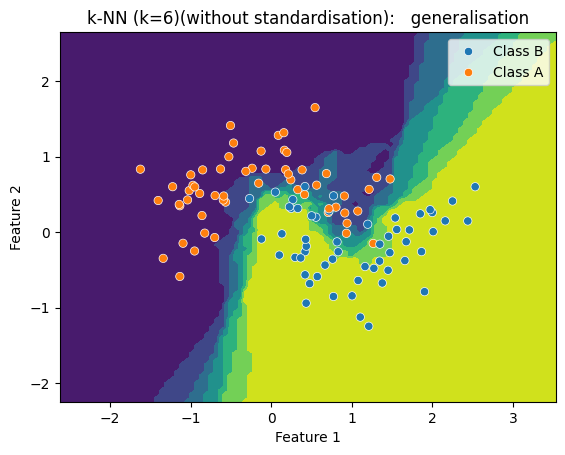

In [ ]:
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

# Loading all the observations of moons
observations = pd.read_csv('moons.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
#25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
#Therefore, we can see whether there is overfitting
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
moons_test_examples = observations_test.drop(columns='Label').to_numpy()
moons_test_labels = observations_test['Label'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
moons_train_examples = observations_train.drop(columns='Label').to_numpy()
moons_train_labels = observations_train['Label'].to_numpy()

# Create a k-NN classifier
k=6
model = KNeighborsClassifier(k)

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(moons_train_examples, moons_train_labels)

# Use the trained model to generate predictions for our testing examples
moons_predictions = model.predict(moons_test_examples)

# Show the performance of the model
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(moons_predictions == moons_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(moons_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print(f"Accuracy of KNN(k={k}) on Moons dataset(without standardisation):", accuracy, "(or", round(accuracy*100, 1), "%)")

# visualise the  generalisation
plt.figure()
disp = DecisionBoundaryDisplay.from_estimator(model, moons_train_examples)
sns.scatterplot(x=moons_train_examples[:, 0], y=moons_train_examples[:, 1], hue=moons_train_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k-NN (k={k})(without standardisation):   generalisation')
plt.show()

Accuracy of  MyKnn_Classifier implementation of KNN(k=6)(without standardisation): 0.972972972972973 (or 97.3 %)


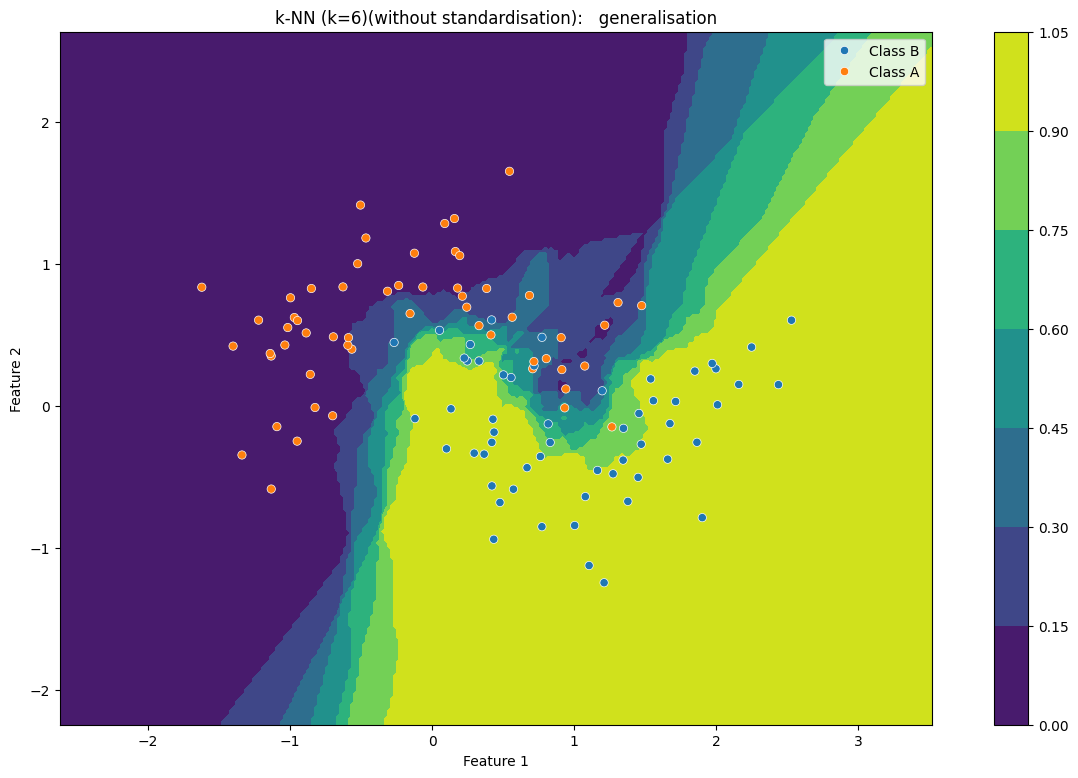

In [ ]:
# Create a MyKnn classifier to implement KNN
# The running time for my graph is long, it is normal for my graph.
#k=6
model = MyKnn_Classifier(k=6)

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(moons_train_examples, moons_train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(moons_test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == moons_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(moons_test_labels)

# Display the accuracy as a single quantitative measure of overall performance
print(f"Accuracy of  MyKnn_Classifier implementation of KNN(k={k})(without standardisation):", accuracy, "(or", round(accuracy*100, 1), "%)")
Visual2D= MyKNN2DColourVisualization(model, label_mapping = {'Class A': 0, 'Class B':1})
Visual2D.draw_graph(moons_train_examples, moons_train_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k-NN (k={k})(without standardisation):   generalisation')
plt.show()

Accuracy of my KNN Classfier of 'moons' same as that of KNN(k=5) with standarding=91.9 %

Accuracy of KNN(k=5) on Moons dataset(with standardisation): 0.918918918918919 (or 91.9 %)


<Figure size 640x480 with 0 Axes>

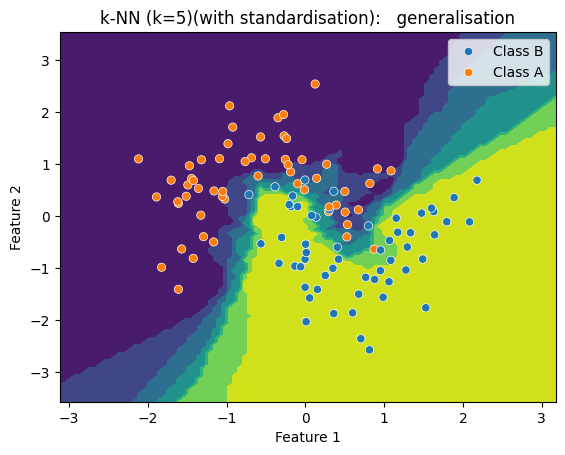

In [ ]:
observations = pd.read_csv('moons.csv')

# Shuffling all the observations to avoid favouritismm in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
#25% of the data will be split testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
moons_test_examples = observations_test.drop(columns='Label').to_numpy()
moons_test_examples= Stand.fit_transform(moons_test_examples)
moons_test_labels = observations_test['Label'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
moons_train_examples = observations_train.drop(columns='Label').to_numpy()
moons_train_examples= Stand.fit_transform(moons_train_examples)
moons_train_labels = observations_train['Label'].to_numpy()

# Create a k-NN classifier
k=5
model = KNeighborsClassifier(k)

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(moons_train_examples, moons_train_labels)


# Use the trained model to generate predictions for our testing examples
moons_predictions = model.predict(moons_test_examples)

# Show the performance of the model
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(moons_predictions == moons_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(moons_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print(f"Accuracy of KNN(k={k}) on Moons dataset(with standardisation):", accuracy, "(or", round(accuracy*100, 1), "%)")

# visualise the   generalisation
plt.figure()
disp = DecisionBoundaryDisplay.from_estimator(model, moons_train_examples)
sns.scatterplot(x=moons_train_examples[:, 0], y=moons_train_examples[:, 1], hue=moons_train_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k-NN (k={k})(with standardisation):   generalisation')
plt.show()

Accuracy of  MyKnn_Classifier implementation of KNN(k=5)(with standardisation): 0.918918918918919 (or 91.9 %)


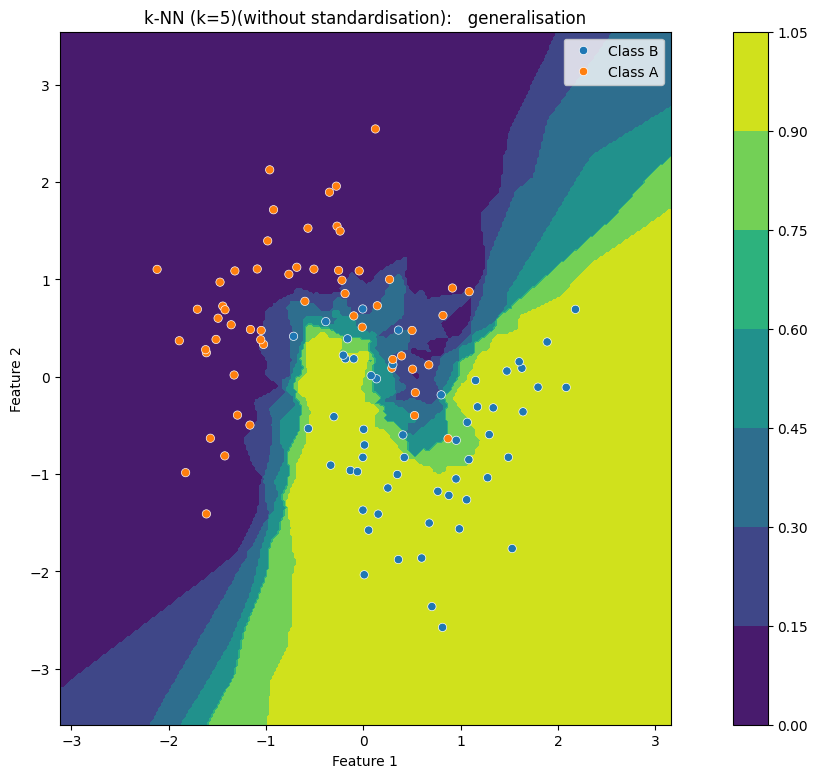

In [ ]:

# Create a MyKnn classifier to implement KNN
# The running time for my graph is long, it is normal for my graph.
#k=5
model = MyKnn_Classifier(k)

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(moons_train_examples, moons_train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(moons_test_examples)

# Show the performance of the model
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == moons_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(moons_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print(f"Accuracy of  MyKnn_Classifier implementation of KNN(k={k})(with standardisation):", accuracy, "(or", round(accuracy*100, 1), "%)")


Visual2D= MyKNN2DColourVisualization(model, label_mapping = {'Class A': 0, 'Class B':1})
Visual2D.draw_graph(moons_train_examples, moons_train_labels)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title(f'k-NN (k={k})(without standardisation):   generalisation')
plt.show()

### Finding Best K

The k=3 is the highest accuracy(97.9 %) in KNN(with standardising).

The change in accuracy with different values of 'k' in my implementation class is the same as the sklearn KNN.

The accuracy of biopsies increases after standardization, whereas the accuracy of moons decreases. This difference in behavior could be attributed to the potential loss of information during standardization, such as the weight of features.

In [ ]:
#Find the change of accuracy of sk learn KNN model with different k
# Create a KNN classifier, considering k from 1 to 20
# Loading all the observations of biopsies
observations = pd.read_csv('biopsies.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
#25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
bi_observations_test = observations_shuffled.iloc[:split_index]
bi_observations_train = observations_shuffled.iloc[split_index:]

Stand= StandardScaler()#Calling Standard Scaler for standardising the data examples
# Splitting into testing examples and testing labels ("vertical split")
bi_test_examples = bi_observations_test.drop(columns='diagnosis').to_numpy()
bi_test_examples = Stand.fit_transform(bi_test_examples)#standardising
bi_test_labels = bi_observations_test['diagnosis'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
bi_train_examples = bi_observations_train.drop(columns='diagnosis').to_numpy()
bi_train_examples = Stand.fit_transform(bi_train_examples)#standardising
bi_train_labels = bi_observations_train['diagnosis'].to_numpy()

n=range(1, 21)
acc_list=[]
for n_neighbors in n:
  # Create a k-NN classifier using k=1 to 20 nearest neighbours
  model = KNeighborsClassifier(n_neighbors)

  #Call the model's fitting algorithm to learn the relationship between training examples and training labels
  model.fit(bi_train_examples, bi_train_labels)

  # Use the trained model to generate predictions for our testing examples
  predictions = model.predict(bi_test_examples)

  # Find the total number of model predictions that matched with the corresponding testing labels
  correct_predictions = sum(predictions == bi_test_labels)
  # Calculate the model's accuracy: the fraction of predictions that were correct
  accuracy = correct_predictions / len(bi_test_labels)
  acc_list.append(accuracy)
  # Display the accuracy as a single quantitative measure of overall performance
  print(f"Accuracy:of KNN(k={n_neighbors}):", accuracy, "(or", round(accuracy*100, 1), "%)")

# Show evaluation results graphically
plt.figure()
plt.plot(n, acc_list, marker='o', linestyle='-')#Set x-axis to be number of k, y-axis to be accuracy
plt.title('Accuracy vs. k-value for k-NN(Biopsies)(with standardization)(SK learn)')#Set title
plt.xlabel('k-value')
plt.ylabel('Accuracy ')
plt.grid(True)
plt.show()



In [ ]:
n=range(1, 21)
acc_list=[]
for n_neighbors in n:
  # Create a k-NN classifier using k=1 to 20 nearest neighbours
  model = MyKnn_Classifier(n_neighbors)

  #Call the model's fitting algorithm to learn the relationship between training examples and training labels
  model.fit(bi_train_examples, bi_train_labels)

  # Use the trained model to generate predictions for our testing examples
  predictions = model.predict(bi_test_examples)

  # Find the total number of model predictions that matched with the corresponding testing labels
  correct_predictions = sum(predictions == bi_test_labels)
  # Calculate the model's accuracy: the fraction of predictions that were correct
  accuracy = correct_predictions / len(bi_test_labels)
  acc_list.append(accuracy)
  # Display the accuracy as a single quantitative measure of overall performance
  print(f"Accuracy:of KNN(k={n_neighbors}):", accuracy, "(or", round(accuracy*100, 1), "%)")

# Show evaluation results graphically
plt.figure()
plt.plot(n, acc_list, marker='o', linestyle='-')#Set x-axis to be number of k, y-axis to be accuracy
plt.title('Accuracy vs. k-value for k-NN(Biopsies)(with standardization)(MyKnn_Classifier)')#Set title
plt.xlabel('k-value')
plt.ylabel('Accuracy ')
plt.grid(True)
plt.show()


The k=4 is the highest accuracy(93 %) in KNN(without standardising).

In [ ]:
#KNN
# Create a KNN classifier, considering k from 1 to 20
# Loading all the observations of biopsies
observations = pd.read_csv('biopsies.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
# 25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
bi_observations_test = observations_shuffled.iloc[:split_index]
bi_observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
bi_test_examples = bi_observations_test.drop(columns='diagnosis').to_numpy()
bi_test_labels = bi_observations_test['diagnosis'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
bi_train_examples = bi_observations_train.drop(columns='diagnosis').to_numpy()
bi_train_labels = bi_observations_train['diagnosis'].to_numpy()

n=range(1, 21)
acc_list=[]
for n_neighbors in n:
  # Create a k-NN classifier using k=1 to 20 nearest neighbours
  model = KNeighborsClassifier(n_neighbors)

  #Call the model's fitting algorithm to learn the relationship between training examples and training labels
  model.fit(bi_train_examples, bi_train_labels)

  # Use the trained model to generate predictions for our testing examples
  predictions = model.predict(bi_test_examples)

  # Find the total number of model predictions that matched with the corresponding testing labels
  correct_predictions = sum(predictions == bi_test_labels)
  # Calculate the model's accuracy: the fraction of predictions that were correct
  accuracy = correct_predictions / len(bi_test_labels)
  acc_list.append(accuracy)
  # Display the accuracy as a single quantitative measure of overall performance
  print(f"Accuracyof KNN(k={n_neighbors}):", accuracy, "(or", round(accuracy*100, 1), "%)")

# Show evaluation results graphically
plt.figure()
plt.plot(n, acc_list, marker='o', linestyle='-')#Set x-axis to be number of k, y-axis to be accuracy
plt.title('Accuracy vs. k-value for k-NN(Biopsies)(without standardization)(SK learn)')#Set title
plt.xlabel('k-value')
plt.ylabel('Accuracy ')
plt.grid(True)
plt.show()


In [ ]:
#KNN
# Create a KNN classifier, considering k from 1 to 20
# Loading all the observations of biopsies
observations = pd.read_csv('biopsies.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
# 25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
bi_observations_test = observations_shuffled.iloc[:split_index]
bi_observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
bi_test_examples = bi_observations_test.drop(columns='diagnosis').to_numpy()
bi_test_labels = bi_observations_test['diagnosis'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
bi_train_examples = bi_observations_train.drop(columns='diagnosis').to_numpy()
bi_train_labels = bi_observations_train['diagnosis'].to_numpy()

n=range(1, 21)
acc_list=[]
for n_neighbors in n:
  # Create a k-NN classifier using k=1 to 20 nearest neighbours
  model = MyKnn_Classifier(n_neighbors)

  #Call the model's fitting algorithm to learn the relationship between training examples and training labels
  model.fit(bi_train_examples, bi_train_labels)

  # Use the trained model to generate predictions for our testing examples
  predictions = model.predict(bi_test_examples)

  # Find the total number of model predictions that matched with the corresponding testing labels
  correct_predictions = sum(predictions == bi_test_labels)
  # Calculate the model's accuracy: the fraction of predictions that were correct
  accuracy = correct_predictions / len(bi_test_labels)
  acc_list.append(accuracy)
  # Display the accuracy as a single quantitative measure of overall performance
  print(f"Accuracyof KNN(k={n_neighbors}):", accuracy, "(or", round(accuracy*100, 1), "%)")

# Show evaluation results graphically
plt.figure()
plt.plot(n, acc_list, marker='o', linestyle='-')#Set x-axis to be number of k, y-axis to be accuracy
plt.title('Accuracy vs. k-value for k-NN(Biopsies)(without standardization)(MyKnn_Classifier)')#Set title
plt.xlabel('k-value')
plt.ylabel('Accuracy ')
plt.grid(True)
plt.show()


Moons

The change in accuracy with different values of 'k' in my implementation class is the same as the sklearn KNN.

In [ ]:
#KNN

# Loading all the observations of moons
observations = pd.read_csv('moons.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
# 25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
moons_test_examples = observations_test.drop(columns='Label').to_numpy()
moons_test_labels = observations_test['Label'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
moons_train_examples = observations_train.drop(columns='Label').to_numpy()
moons_train_labels = observations_train['Label'].to_numpy()


# Create a KNN classifier, considering k from 1 to 20
n=range(1, 21)
acc_list=[]
for n_neighbors in n:

  # Create a k-NN classifier using k=1 to 20 nearest neighbours
  model = KNeighborsClassifier(n_neighbors)

  #Call the model's fitting algorithm to learn the relationship between training examples and training labels
  model.fit(moons_train_examples, moons_train_labels)

  # Use the trained model to generate predictions for our testing examples
  predictions = model.predict(moons_test_examples)

  # Find the total number of model predictions that matched with the corresponding testing labels
  correct_predictions = sum(predictions == moons_test_labels)
  # Calculate the model's accuracy: the fraction of predictions that were correct
  accuracy = correct_predictions / len(moons_test_labels)
  acc_list.append(accuracy)
  # Display the accuracy as a single quantitative measure of overall performance
  print(f"Accuracy:of KNN(k={n_neighbors}):", accuracy, "(or", round(accuracy*100, 1), "%)")

# Show evaluation results graphically
plt.figure()
plt.plot(n, acc_list, marker='o', linestyle='-')#Set x-axis to be number of k, y-axis to be accuracy
plt.title('Accuracy vs. k-value for k-NN(Moons)(without standardization)(Sk learn)')#Set title
plt.xlabel('k-value')
plt.ylabel('Accuracy ')
plt.grid(True)
plt.show()



In [ ]:
#KNN

# Loading all the observations of moons
observations = pd.read_csv('moons.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
# 25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
moons_test_examples = observations_test.drop(columns='Label').to_numpy()
moons_test_labels = observations_test['Label'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
moons_train_examples = observations_train.drop(columns='Label').to_numpy()
moons_train_labels = observations_train['Label'].to_numpy()


# Create a KNN classifier, considering k from 1 to 20
n=range(1, 21)
acc_list=[]
for n_neighbors in n:

  # Create a k-NN classifier using k=1 to 20 nearest neighbours
  model = MyKnn_Classifier(n_neighbors)

  #Call the model's fitting algorithm to learn the relationship between training examples and training labels
  model.fit(moons_train_examples, moons_train_labels)

  # Use the trained model to generate predictions for our testing examples
  predictions = model.predict(moons_test_examples)

  # Find the total number of model predictions that matched with the corresponding testing labels
  correct_predictions = sum(predictions == moons_test_labels)
  # Calculate the model's accuracy: the fraction of predictions that were correct
  accuracy = correct_predictions / len(moons_test_labels)
  acc_list.append(accuracy)
  # Display the accuracy as a single quantitative measure of overall performance
  print(f"Accuracy:of KNN(k={n_neighbors}):", accuracy, "(or", round(accuracy*100, 1), "%)")

# Show evaluation results graphically
plt.figure()
plt.plot(n, acc_list, marker='o', linestyle='-')#Set x-axis to be number of k, y-axis to be accuracy
plt.title('Accuracy vs. k-value for k-NN(Moons)(without standardization)(MyKnn_Classifier)')#Set title
plt.xlabel('k-value')
plt.ylabel('Accuracy ')
plt.grid(True)
plt.show()



In [ ]:
#KNN

# Loading all the observations of moons
observations = pd.read_csv('moons.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
# 25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
moons_test_examples = observations_test.drop(columns='Label').to_numpy()
moons_test_examples = Stand.fit_transform(moons_test_examples)
moons_test_labels = observations_test['Label'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
moons_train_examples = observations_train.drop(columns='Label').to_numpy()
moons_train_examples = Stand.transform(moons_train_examples)
moons_train_labels = observations_train['Label'].to_numpy()


# Create a KNN classifier, considering k from 1 to 20
n=range(1, 21)
acc_list=[]
for n_neighbors in n:

  # Create a k-NN classifier using k=1 to 20 nearest neighbours
  model = KNeighborsClassifier(n_neighbors)

  #Call the model's fitting algorithm to learn the relationship between training examples and training labels
  model.fit(moons_train_examples, moons_train_labels)

  # Use the trained model to generate predictions for our testing examples
  predictions = model.predict(moons_test_examples)

  # Find the total number of model predictions that matched with the corresponding testing labels
  correct_predictions = sum(predictions == moons_test_labels)
  # Calculate the model's accuracy: the fraction of predictions that were correct
  accuracy = correct_predictions / len(moons_test_labels)
  acc_list.append(accuracy)
  # Display the accuracy as a single quantitative measure of overall performance
  print(f"Accuracy:of KNN(k={n_neighbors}):", accuracy, "(or", round(accuracy*100, 1), "%)")

# Show evaluation results graphically
plt.figure()
plt.plot(n, acc_list, marker='o', linestyle='-')#Set x-axis to be number of k, y-axis to be accuracy
plt.title('Accuracy vs. k-value for k-NN(Moons)(without standardization)(SK learn)')#Set title
plt.xlabel('k-value')
plt.ylabel('Accuracy ')
plt.grid(True)
plt.show()



In [ ]:
#KNN

# Loading all the observations of moons
observations = pd.read_csv('moons.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
# 25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
moons_test_examples = observations_test.drop(columns='Label').to_numpy()
moons_test_examples = Stand.fit_transform(moons_test_examples)
moons_test_labels = observations_test['Label'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
moons_train_examples = observations_train.drop(columns='Label').to_numpy()
moons_train_examples = Stand.transform(moons_train_examples)
moons_train_labels = observations_train['Label'].to_numpy()


# Create a KNN classifier, considering k from 1 to 20
n=range(1, 21)
acc_list=[]
for n_neighbors in n:

  # Create a k-NN classifier using k=1 to 20 nearest neighbours
  model = MyKnn_Classifier(n_neighbors)

  #Call the model's fitting algorithm to learn the relationship between training examples and training labels
  model.fit(moons_train_examples, moons_train_labels)

  # Use the trained model to generate predictions for our testing examples
  predictions = model.predict(moons_test_examples)

  # Find the total number of model predictions that matched with the corresponding testing labels
  correct_predictions = sum(predictions == moons_test_labels)
  # Calculate the model's accuracy: the fraction of predictions that were correct
  accuracy = correct_predictions / len(moons_test_labels)
  acc_list.append(accuracy)
  # Display the accuracy as a single quantitative measure of overall performance
  print(f"Accuracy:of KNN(k={n_neighbors}):", accuracy, "(or", round(accuracy*100, 1), "%)")

# Show evaluation results graphically
plt.figure()
plt.plot(n, acc_list, marker='o', linestyle='-')#Set x-axis to be number of k, y-axis to be accuracy
plt.title('Accuracy vs. k-value for k-NN(Moons)(with standardization)(MyKnn_Classifier)')#Set title
plt.xlabel('k-value')
plt.ylabel('Accuracy ')
plt.grid(True)
plt.show()


The k= 5 is the highest accuracy(91.9 %) in KNN(with standardising).

## My implementation(Gaussian Naive Bayes)
Optional section. If you're going to combine multiple different predictive model implementations together in an ensemble (for credit in the first class band), then you should repeat the basic structure above to demonstrate that each of your individual models works. Note it's still possible to build a simple ensemble using different versions of the same model (e.g., using different hyperparameters, or by training them on different samples of the training data) and that could also get credit in the first class band (see the example notebook).

<<<**Optional text goes here**: You can leave this section blank if you want to. But it might be helpful to at least mention the name of the predictive model that you're implementing, and anything else you want me to know when I'm marking.>>>

In [ ]:
# Class summary comment:
#MyNaiveBayesClassifier is an implementation of the Gaussian Naive Bayes model and does not have any hyperparameters
#It assumes that the features are independent of each other given the class label and follows a Gaussian (normal) distribution.
#In the context of Gaussian Naive Bayes, it assumes all features are independent. This assumption simplifies the computation and makes the algorithm computationally efficient, especially when dealing with a large number of features.
#All the self elements will automatically return.
#predict_class_probability: A method to calculate the similarity (considering mean and standard deviation) between a data example and other examples. Higher similarity indicates a higher probability of it belonging to a specific class.
#fit: A method that puts training labels and examples to calculate the mean and standard deviation of the data points.
#In Naive Bayes, we consider the distribution of each prediction class and the continuous-valued features in the dataset follow a Gaussian distribution (also known as a normal distribution).
#By the mean and standard deviation, we can know the distribution of each class and predict them by features.
#predict_one: A method to predict the class of a single example by comparing its similarity with the training examples.
#predict: A method to predict the classes of multiple examples using the predict_one method.


# Class code:

class MyNaiveBayesClassifier:
    #Set the instances
    def fit(self, examples, labels):
        self.unique_classes = np.unique(labels) #get the unique labels
        self.class_priors = {}
        self.class_similarity = {}

        #Find the pior probability of the labels and create the distributions
        for c in self.unique_classes:
            examples_c = examples[labels == c]
            self.class_priors[c] = len(examples_c) / len(examples)

            # Calculate mean and standard deviation for each feature in class c
            means = np.mean(examples_c, axis=0)
            stds = np.std(examples_c, axis=0)

            self.class_similarity[c] = (means, stds)

    #Calculate the probability of a data in a particular range
    def calculate_PDF(self, x, mean, std):
        epsilon = 1e-9  # To avoid divided by 0
        exponent = -((x - mean) ** 2) / (2 * (std ** 2+epsilon))#Gaussian Naive Bayes Equation
        return np.exp(exponent) / (np.sqrt(2 * np.pi) * std)#Return the PDF

    #Find the label based on the probaility of the distribution
    def convert_classes(self, similarities):
        predicted_class = self.unique_classes[np.argmax(similarities)]
        return predicted_class#return the prediction label

    #Find the distribution and similarity of a data
    def predict_class_probability(self, this_example, test_examples):
        similarities=[]

        #Compare the similarity of the example with the height of each distribution of labels.
        for c in self.unique_classes:
                class_mean, class_std = self.class_similarity[c]

                # Calculate the similarities for each feature in class c
                similarity = np.prod(self.calculate_PDF(this_example, class_mean, class_std))

                similarities.append(similarity * self.class_priors[c])
        similarities = similarities / np.sum(similarities)
        return similarities

    #Predict a example
    def predict_one(self, this_example, test_examples):

        return self.convert_classes(self.predict_class_probability(this_example, test_examples))




    #Find the prediction for all test examples
    def predict(self, test_examples):
        if test_examples.ndim == 1:
          return self.predict_one(test_examples,  test_examples)#Use predict_one if we only predict 1 data point

        # get ready to store predictions for all the testing examples (2D array)
        predicted_labels = []

        # loop over all the testing examples that were passed to us
        for i in range(test_examples.shape[0]):

            # For this one testing example
            this_example = test_examples[i,:]

            # generate a prediction and store it
            predicted_labels.append(self.predict_one(this_example, test_examples))

        # return all the predictions as a numpy array
        return np.array(predicted_labels)


In [ ]:
class My2DColourVisualization:
    def __init__(self, model, label_mapping):
        self.model = model
        self.label_mapping = label_mapping

    def draw_graph(self, train_examples, train_labels):
        if train_examples.ndim != 2 or train_examples.shape[1] != 2:
            raise ValueError("It must be a 2D array with shape (n_samples, 2)")

        #Find the range of X-axis values and Y-axis values
        x_min = train_examples[:, 0].min() - 1
        x_max = train_examples[:, 0].max() + 1
        y_min = train_examples[:, 1].min() - 1
        y_max = train_examples[:, 1].max() + 1

        #Create all possible data points for drawing the Decision Boundary
        xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                             np.arange(y_min, y_max, 0.02))

        #Find the prediction regions of all possible data points. We use model.predict_similarities find the likelighood to each labels.
        Z = []
        for x_row, y_row in zip(xx, yy):
            for x, y in zip(x_row, y_row):
                xy = np.array([x, y])
                z = self.model.predict_class_probability(xy, train_examples)
                Z.append(z)

        #Change the prediction labels to numerical for drawing the graph
        Z = np.array([z[1] for z in Z]).reshape(xx.shape)
        numeric_labels = np.array([self.label_mapping[label] for label in train_labels])

        #Draw Decision Boundary graph
        plt.figure(figsize=(16, 9))
        h = plt.contourf(xx, yy, Z)
        plt.axis('scaled')
        plt.colorbar()
        unique_classes= np.unique(train_labels)

        #Put the train_examples data points on it
        sns.scatterplot(x=train_examples[:, 0], y=train_examples[:, 1], hue=train_labels)



## My calling code(Gaussian Naive Bayes)

Optional section. This section should contain code that demonstrates your implementation works, and that it generates appropriate results. This might include doing things like evaluating performance on one or more datasets and/or generating feature space visualisations. And it should typically compare results against the equivalent scikit-learn implementation to show they are similar.

<<<**Optional text goes here**: You can leave this section blank if you want to. But it might be useful to include a quick comment on the results you get from your implementation, and whether they are what you expected or not.>>>

### Biopsies dataset
The accuracy of Gaussian Naive Bayes model and that of MyNaiveBayesClassifier are the same, 93.0 %.

In [ ]:
#import library
from sklearn.naive_bayes import GaussianNB

#Call SKlearn Gaussian Naive Bayes model
model = GaussianNB()

#Call the model's fitting algorithm, passing in our training examples and training labels
model.fit(bi_train_examples, bi_train_labels)
# Use the trained model to generate predictions for our testing examples
bi_predictions = model.predict(bi_test_examples)

# Show the performance of the model
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(bi_predictions == bi_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(bi_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of GaussianNB on bi:", accuracy, "(or", round(accuracy*100, 1), "%)")




In [ ]:
#Call MyNaiveBayesClassifier model to implement Gaussian Naive Bayes Classifier
model = MyNaiveBayesClassifier()

#Call the model's fitting algorithm, passing in our training examples and training labels
model.fit(bi_train_examples,bi_train_labels)

# Use the trained model to generate predictions for our testing examples
bi_predictions = model.predict(bi_test_examples)

# Show the performance of the model
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(bi_predictions == bi_test_labels)
accuracy = correct_predictions / len(bi_test_labels)

#Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of MyNaiveBayesClassifier on bi dataset:", accuracy, "(or", round(accuracy * 100, 1), "%)")


### Moons Dataset

The accuracy of the Gaussian Naive Bayes model and MyNaiveBayesClassifier is the same, 94.6%.

From the graph, we can see that it is approximately following the Gaussian distribution. The deep blue indicates the likelihood of it with class A, in the mean time the yellow indicates the likelihood of it with class B.

There are more data points in the middle of each cluster distribution and fewer data points in the broader areas. Meanwhile, most of the orange points (Class A) are concentrated in the top-left quadrant,
blue points (Class B) dominate the bottom-right quadrant. The overlap between both classes near the origin (0,0) suggests that this area contains mixed classifications. However, the desicion broader of the 2 classes is overlapped, which means there is no clear and distinct separation between the two classes based on their feature values.


In [ ]:
#This part is about visualise the prediction area of the Gaussian Naive Bayes model
#import libraries
from sklearn.inspection import DecisionBoundaryDisplay
import seaborn as sns

#Call SKlearn Gaussian Naive Bayes model
model = GaussianNB()

#Call the model's fitting algorithm, passing in our training examples and training labels
model.fit(moons_train_examples, moons_train_labels)
# Use the trained model to generate predictions for our testing examples
moons_predictions = model.predict(moons_test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(moons_predictions == moons_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(moons_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of GaussianNB:", accuracy, "(or", round(accuracy*100, 1), "%)")


# visualise the   generalisation
plt.figure()
disp = DecisionBoundaryDisplay.from_estimator(model, moons_train_examples)#Display the Decision Boundaries of the model
sns.scatterplot(x=moons_train_examples[:, 0], y=moons_train_examples[:, 1], hue=moons_train_labels)#Show data point in points based on Feature 1 and Feature 2
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Naive Bayes : Moons   generalisation(DecisionBoundaryDisplay)')
plt.show()

In [ ]:
#Call MyNaiveBayesClassifier(my implementation of Gaussian Naive Bayes)
model = MyNaiveBayesClassifier()

#Call the model's fitting algorithm, passing in our training examples and training labels
model.fit(moons_train_examples,moons_train_labels)

# Use the trained model to generate predictions for our testing examples
moons_predictions = model.predict(moons_test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(moons_predictions == moons_test_labels)
accuracy = correct_predictions / len(moons_test_labels)

#Display the Accuracy
print("Accuracy of MyNaiveBayesClassifier:", accuracy, "(or", round(accuracy * 100, 1), "%)")

Visual2D= My2DColourVisualization(model, label_mapping = {'Class A': 0, 'Class B':1})
Visual2D.draw_graph(moons_train_examples, moons_train_labels)

plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Gaussian Naive Bayes : Moons generalisation(My Visuliasation)')
plt.show()

The similarity of my GaussianNB classifier has the same results with the sk-learn-proba.

By selecting the first 5 data points, the likelihood probability of my GaussianNB on Moon is the same as that of the SKLearn model.

In [ ]:
#Find the similarity of the first 5 data example in sk learn
#Call SKlearn Gaussian Naive Bayes model
model = GaussianNB()
#Call the model's fitting algorithm, passing in our training examples and training labels
model.fit(moons_train_examples,moons_train_labels)
# Extract the first 5 examples from the training set
moons5 = moons_train_examples[0:5]
print(model.predict_proba(moons5))

In [ ]:
#Find the similarity of the first 5 data example in my GaussianNB classifer

#Call SKlearn Gaussian Naive Bayes model
model = MyNaiveBayesClassifier()
#Call the model's fitting algorithm, passing in our training examples and training labels
model.fit(moons_train_examples,moons_train_labels)
# Extract the first 5 examples from the training set
#My classifier predicts them one-by-one.
for i in moons5:

    print(model.predict_class_probability(i, moons_train_examples))



## My implementation (Decision Tree)



In [ ]:
# Class summary comment:
import numpy as np
# Node is for creating the Node structure for the tree. There are some parameters inside
# MyDecisionTreeClassifier is an implementation of the Decision Tree Classifier model
#  Each internal node represents a feature or attribute, each branch represents a decision based on that feature, and each leaf node represents the outcome or prediction.
# The decision on which feature to split on and the value of the split is determined using various criteria, in this time, we use the Gini index.
#  _build_tree is a method to build the Decision tree structure
#  _gini_impurity calculates the impurity of a node by Gini index
# fit: put the training example and training labels to train the model
# _choose_best_split: Find the best condition that can split the nodes with the best purity
# _calculate_gini_index: Put the left labels and right labels. Then, it will provide the Gini index for you.
# _split_dataset: split the data set into left and right nodes
# predict: input the predicting examples, then it will predict the labels
#_traverse_tree: Check if the node should be a left node or still need some split. Make sure the structure is correct
# The decision tree predicts the class label of an instance by traversing down the tree from the root to a leaf node, following the decision rules at each node.
# The class label associated with the leaf node is then assigned as the prediction.

# Node is used to create the node structure
class Node:
    def __init__(self, feature=None, border=None, left=None, right=None, value=None):
        self.feature = feature# Examples
        self.border = border# Conditions
        self.left = left
        self.right = right
        self.value = value

# MyDecisionTreeClassifier is an implementation of the Decision Tree Classifier model
class MyDecisionTreeClassifier:
    def __init__(self, min_samples_split=None, random_state=None):
        self.min_samples_split = min_samples_split  # Set the number to stop splitting while the example in the node is smaller than this number
        self.random_state = random_state  # seed for the random number generator
        self.random_generator = np.random.default_rng(seed=random_state)#Random number

    def fit(self, examples, labels):
        self.num_classes = len(np.unique(labels))  # number of unique classes in the labels
        self.num_features = examples.shape[1]  # number of features in the examples
        self.tree = self._build_tree(examples, labels)


    #Build the decision tree
    def _build_tree(self, examples, labels):
        # Base cases for recursion
        # See whether the node is purified already
        if len(np.unique(labels)) == 1:
            return Node(value=labels[0])  # if all labels are the same, create a leaf node with the label value
        if len(labels) < self.min_samples_split:
            return Node(value=self._most_common_label(labels))  # if the number of examples is too small, create a leaf node with the most common label

        best_feature, best_border = self._choose_best_split(examples, labels)  # find the best feature and border to split the examples
        left_examples, left_labels, right_examples, right_labels = self._split_dataset(examples, labels, best_feature, best_border)  # split the examples and labels based on the best feature and border

        left_subtree = self._build_tree(left_examples, left_labels)  # recursively build the left subtree
        right_subtree = self._build_tree(right_examples, right_labels)  # recursively build the right subtree

        return Node(feature=best_feature, border=best_border, left=left_subtree, right=right_subtree)  # Create a node with the best feature and border and assign the left and right subtrees

    #Find the best border to split the node(The node is purest after the split)
    def _choose_best_split(self, examples, labels):
        best_gini = float('inf')#Set best_gini as floating number to reduce error
        best_feature = None
        best_border = None

        #Loop all examples in the node
        for feature in range(self.num_features):
            feature_values = examples[:, feature]

            #Looping all features to find the best value for splitting
            for value in feature_values:
                left_indices = examples[:, feature] <= value #Find the indices of left node examples
                right_indices = examples[:, feature] > value#Find the indices of right node examples


                gini_index = self._calculate_gini_index(labels[left_indices], labels[right_indices])  # calculate the Gini index for the split
                if gini_index < best_gini:  # update the best Gini index and the corresponding feature and border if the current split has a lower Gini index
                    best_gini = gini_index
                    best_feature = feature
                    best_border = value

        return best_feature, best_border#Return the best_feature, best_border

    #Calculate the Gini index as the measurement of how pure after the split. (better if it is close to 1)
    def _calculate_gini_index(self, left_labels, right_labels):
        total_samples = len(left_labels) + len(right_labels)
        p_left = len(left_labels) / total_samples#probability of getting the left_labels in all labels
        p_right = len(right_labels) / total_samples#probability of getting the right_labels in all labels

        gini_index = p_left * self._gini_impurity(left_labels) + p_right * self._gini_impurity(right_labels)  # calculate the weighted Gini index

        return gini_index

    def _gini_impurity(self, labels):
        _, counts = np.unique(labels, return_counts=True)
        probabilities = counts / len(labels)
        gini = 1 - sum(probabilities ** 2)  # calculate the Gini impurity

        return gini

    #Put the data example and labels into different nodes based on the split
    #Thus, we know how to further split the data
    def _split_dataset(self, examples, labels, feature_index, border):
        left_indices = examples[:, feature_index] <= border#a boolean array indicating which examples satisfy "smaller than or equal to the border"
        right_indices = examples[:, feature_index] > border#a boolean array indicating which examples satisfy "larger than the border"

        left_examples = examples[left_indices]#The examples in left_indices
        left_labels = labels[left_indices]#The lebals of examples in left_indices
        right_examples = examples[right_indices]#The examples in left_indices
        right_labels = labels[right_indices]#The lebals of examples in right_indices

        return left_examples, left_labels, right_examples, right_labels

    #Find the most common label, because it has higher value to splite
    def _most_common_label(self, labels):
      label_counts = {}
      for label in labels:
          if label in label_counts:
              label_counts[label] += 1
          else:
              label_counts[label] = 1

      most_common_label = None
      max_count = 0
      for label, count in label_counts.items():
          if count > max_count:
              most_common_label = label
              max_count = count

      return most_common_label

#Find the predictions for each test example.
    def predict(self, examples):
        return np.array([self._traverse_tree(x, self.tree) for x in examples])  # traverse the decision tree for each example and make predictions

#Go through all nodes to make  sure the structure is correct
    def _traverse_tree(self, example, node):
        #if the current node is a leaf node
        if node.value is not None:
            return node.value
        #if the node needs to be split, go left, otherwise go right
        if example[node.feature] <= node.border:

            return self._traverse_tree(example, node.left)

        return self._traverse_tree(example, node.right)

    #Display the decision tree structure
    def visualize_tree(self, node=None, depth=0):
        if node is None:
            node = self.tree

        if node is not None:
            prefix = "| " * depth
            if node.feature is not None:
                print(prefix + "if feature {} <= {}: ".format(node.feature, node.border))
                print(prefix + "|-> Left:")
                self.visualize_tree(node.left, depth + 1)#Go to the laft node
                print(prefix + "|-> Right:")
                self.visualize_tree(node.right, depth + 1)#Go to the right node
            else:
                print(prefix + "class:", node.value)


## My calling code(Decision Tree)

### Biopsies dataset
 The accuracy of  DecisionTreeClassifier model id 93.7% and that of MyDecisionTreeClassifier is 93.0%, they are the similar, only 0.7% difference.
 The Decision Tree stucture of my Decision Tree implenment is similiar with that of the SK learn.


In [ ]:
#import library
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.tree import DecisionTreeClassifier, plot_tree


# Loading all the observations of biopsies
observations = pd.read_csv('biopsies.csv')

#Get the features
features = observations.columns.drop('diagnosis').to_numpy()
# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
# 25% of the data will be split for testing
testing_fraction = 0.25
split_indeexample = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
#Therefore, we can see whether there is overfitting
bi_observations_test = observations_shuffled.iloc[:split_indeexample]
bi_observations_train = observations_shuffled.iloc[split_indeexample:]


# Splitting into testing examples and testing labels ("vertical split")
bi_test_examples = bi_observations_test.drop(columns='diagnosis').to_numpy()
#bi_test_examples = Stand.fit_transform(bi_test_examples)
bi_test_labels = bi_observations_test['diagnosis'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
bi_train_examples = bi_observations_train.drop(columns='diagnosis').to_numpy()
#bi_train_examples = Stand.fit_transform(bi_train_examples)
bi_train_labels = bi_observations_train['diagnosis'].to_numpy()

# Create a Decision Tree model object and set the minimum parent size hyperparameter to 100:
model = DecisionTreeClassifier(min_samples_split=10, random_state=99)
#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(bi_train_examples, bi_train_labels)

# Show the performance of the model
# Use the trained model to generate predictions for our testing examples
predictions = model.predict(bi_test_examples)
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == bi_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(bi_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of sklearn Decision Tree:", accuracy, "(or", round(accuracy*100, 1), "%)")

# show a diagram of the resulting tree structure
plt.figure(figsize=(18, 9))#Set thethe figure size to 18 inches in width and 9 inches in height.
plot_tree(model, feature_names=features.tolist(), class_names=model.classes_.tolist())
plt.show()

In [ ]:
# Loading all the observations of biopsies
observations = pd.read_csv('biopsies.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
# 25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
#Therefore, we can see whether there is overfitting
bi_observations_test = observations_shuffled.iloc[:split_index]
bi_observations_train = observations_shuffled.iloc[split_index:]

# Splitting into training examples and training labels ("vertical split")
bi_test_examples = bi_observations_test.drop(columns='diagnosis').to_numpy()
bi_test_labels = bi_observations_test['diagnosis'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
bi_train_examples = bi_observations_train.drop(columns='diagnosis').to_numpy()
bi_train_labels = bi_observations_train['diagnosis'].to_numpy()

# Create a Decision Tree model object and set the minimum samples split hyperparameter to 10:
model = MyDecisionTreeClassifier(min_samples_split=5, random_state=42)

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(bi_train_examples, bi_train_labels)
# Use the trained model to generate predictions for our testing examples
predictions = model.predict(bi_test_examples)

# Show the performance of the model
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == bi_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(bi_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of my Decision Tree implement:", accuracy, "(or", round(accuracy*100, 1), "%)")
# Plot the decision tree structure
model.visualize_tree()

### Moons Dataset

The accuracy of myDecision Tree Classifier is same as the sk-learn Decision Tree Classifier, 91.9%.

In [ ]:
# Loading all the observations of biopsies
observations = pd.read_csv('moons.csv')

#Get the features
features = observations.columns.drop('Label').to_numpy()
# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

stand = StandardScaler()  # Calling Standard Scaler for standardizing the data examples

# Setting the fraction of observations we will use for testing
#25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
#Therefore, we can see whether there is overfitting
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
moons_test_examples = observations_test.drop(columns='Label').to_numpy()
moons_test_labels = observations_test['Label'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
moons_train_examples = observations_train.drop(columns='Label').to_numpy()
moons_train_labels = observations_train['Label'].to_numpy()

# Create a Decision Tree model object and set the minimum parent size hyperparameter to 100:
model = DecisionTreeClassifier(min_samples_split=10, random_state=99)
#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(moons_train_examples, moons_train_labels)
# Use the trained model to generate predictions for our testing examples
predictions = model.predict(moons_test_examples)

# Show the performance of the model
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == moons_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(moons_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of Moons(SK learn Decision Tree Classifier):", accuracy, "(or", round(accuracy*100, 1), "%)")

# show a diagram of the resulting tree structure
plt.figure(figsize=(18, 9))#Set the figure size to 18 inches in width and 9 inches in height.
plot_tree(model, feature_names=features.tolist(), class_names=model.classes_.tolist())
plt.show()

In [ ]:
# Loading all the observations of moons
observations = pd.read_csv('moons.csv')

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
# 25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
#Therefore, we can see whether there is overfitting
observations_test = observations_shuffled.iloc[:split_index]
observations_train = observations_shuffled.iloc[split_index:]

# Tell the program which features it will learn from and the target prediction feature.
# Splitting into testing examples and testing labels ("vertical split")
moons_test_examples = observations_test.drop(columns='Label').to_numpy()
moons_test_labels = observations_test['Label'].to_numpy()


# Splitting into training examples and training labels ("vertical split")
moons_train_examples = observations_train.drop(columns='Label').to_numpy()
moons_train_labels = observations_train['Label'].to_numpy()

# Create a Decision Tree model object and set the minimum parent size hyperparameter to 100:
model = MyDecisionTreeClassifier(min_samples_split=10, random_state=99)
#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(moons_train_examples, moons_train_labels)
# Use the trained model to generate predictions for our testing examples
predictions = model.predict(moons_test_examples)
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == moons_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(moons_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of moons(my Decision Tree Classifier):", accuracy, "(or", round(accuracy*100, 1), "%)")
# Plot the decision tree structure
model.visualize_tree()

# Ensemble


## My implementation
This section should include a class that implements an ensemble. It will typically be a class with a summary code comment at the top, explaining how the ensemble works, a constructor (that might support some useful hyperparameters), a `fit()` method, a `predict_one()` method, and a `predict()` method. The code inside the class should be appropriately commented. See also the marking criteria.

<<<**Optional text goes here**: You can leave this section blank if you want to. But it might be helpful to mention the kind of ensemble that you've worked on implementing, and anything else you want me to know when I'm marking.>>>


In [ ]:
# You should call on your ensemble to demonstrate it works. More
# extensive testing can get you higher marks. See also the marking criteria.

# MyEnsembleClassifier: Put the list of models into the classifier, and then it can fit the model by considering the voting of all models.
# It is a hard voting classifier.
# It assume a binary classification problem.

# fit: fit the models to build a new model based on the training examples and labels
# predict: make predictions based on the testing examples

class MyEnsembleClassifier:
    def __init__(self, estimators):
        self.estimators = estimators

    # fit the models to build a new model based on the training examples and labels
    def fit(self, examples, labels):
      #Get the estimator of the models and fit it
        for estimator in self.estimators:
            estimator.fit(examples, labels)

    # make predictions based on the testing examples
    def predict(self, examples):
        predictions = []
        #Get the estimators by predicting the testing examples
        for estimator in self.estimators:
            predictions.append(estimator.predict(examples))

        # Perform majority voting
        # For simplicity, we assume a binary classification problem
        final_predictions = []
        #get voting from all models and calculate the weighting for the final prediction
        for i in range(len(examples)):
            votes = [prediction[i] for prediction in predictions]
            final_predictions.append(max(set(votes), key=votes.count))

        return final_predictions


## My calling code
This section should contain code that demonstrates your ensemble implementation works, and that it generates appropriate results. This might include doing things like evaluating performance on one or more datasets and/or generating feature space visualisations. And it should typically compare results against the equivalent scikit-learn implementation to show they are similar.

<<<**Optional text goes here**: You can leave this section blank if you want to. But it might be useful to include a quick comment on the results you get from your ensemble implementation, and whether they are what you expected or not.>>>

### Biopsies dataset
The accuracy of my ensemble classifier is 95.1%, which is comparable to the SKLearn ensemble classifier with an accuracy of 95.8%. This similarity can be attributed to the difference in the Decision Tree implementations. In my Decision Tree implementation, the accuracy is 93.0%, whereas the accuracy of the SKLearn Decision Tree is 93.7%. The difference between them is 0.7%, which exactly matches the accuracy gap between my ensemble and the SKLearn ensemble. Thus, my ensemble is comparable to the sci-kit learn one.

No standardization was applied because the data will be considered for Gaussian Naive Bayes.

My Ensemble implement with my KNN, Gaussian Naive Bayes and Decision Tree Classifiers

In [ ]:

# Loading all the observations of biopsies
observations = pd.read_csv('biopsies.csv')

# Get the features
features = observations.columns.drop('diagnosis').to_numpy()

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
#  25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
bi_observations_test = observations_shuffled.iloc[:split_index]
bi_observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
bi_test_examples = bi_observations_test.drop(columns='diagnosis').to_numpy()
bi_test_labels = bi_observations_test['diagnosis'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
bi_train_examples = bi_observations_train.drop(columns='diagnosis').to_numpy()
bi_train_labels = bi_observations_train['diagnosis'].to_numpy()

#My classification models
model1 = MyKnn_Classifier(4)#My implement of KNN (k=4), considers the nearest 4 deata point for prediction
model2 = MyNaiveBayesClassifier()
model3 = MyDecisionTreeClassifier(min_samples_split=10, random_state=99)

# Create a hard-voting ensemble composed of a k-NN, NB, and DT classifier
model = MyEnsembleClassifier([model1, model2, model3])

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(bi_train_examples, bi_train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(bi_test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == bi_test_labels)

# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(bi_test_labels)

# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of my ensemble:", accuracy, "(or", round(accuracy*100, 1), "%)")

SK learn emsemble

In [ ]:
# import library
from sklearn.ensemble import VotingClassifier

#models
model1= KNeighborsClassifier(4)#KNN (k=4), considers the nearest 4 deata point for prediction
model2= GaussianNB()#GaussianNB
model3 = DecisionTreeClassifier(min_samples_split=10, random_state=99)

# Create a hard-voting ensemble composed of a k-NN, NB and DT classifier
model = VotingClassifier(estimators=[('knn', model1), ('nb', model2), ('dt', model3)])

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(bi_train_examples, bi_train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(bi_test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == bi_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(bi_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of Sk learn:", accuracy, "(or", round(accuracy*100, 1), "%)")

### Moons dataset
The accuracy of my ensemble classifier is 97.3%, which is equal to the SKLearn ensemble classifier with an accuracy of 97.3%.

No standardisation.

In [ ]:
# Loading all the observations of moons
observations = pd.read_csv('moons.csv')

# Get the features
features = observations.columns.drop('Label').to_numpy()

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
#  25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
moons_observations_test = observations_shuffled.iloc[:split_index]
moons_observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
moons_test_examples = moons_observations_test.drop(columns='Label').to_numpy()
moons_test_labels = moons_observations_test['Label'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
moons_train_examples = moons_observations_train.drop(columns='Label').to_numpy()
moons_train_labels = moons_observations_train['Label'].to_numpy()

#My classification models
model1 = MyKnn_Classifier(6)#My implement of KNN (k=6), considers the nearest 4 deata point for prediction
model2 = MyNaiveBayesClassifier()
model3 = MyDecisionTreeClassifier(min_samples_split=10, random_state=99)

# Create a hard-voting ensemble composed of a k-NN, NB, and DT classifier
model = MyEnsembleClassifier([model1, model2, model3])

# Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(moons_train_examples, moons_train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(moons_test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == moons_test_labels)

# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(moons_test_labels)

# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of my ensemble:", accuracy, "(or", round(accuracy*100, 1), "%)")

In [ ]:
#models
model1= KNeighborsClassifier(6)#KNN (k=6), considers the nearest 4 deata point for prediction
model2= GaussianNB()#GaussianNB
model3 = DecisionTreeClassifier(min_samples_split=10, random_state=99)

# Create a hard-voting ensemble composed of a k-NN, NB and DT classifier
model = VotingClassifier(estimators=[('knn', model1), ('nb', model2), ('dt', model3)])
#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(moons_train_examples, moons_train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(moons_test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == moons_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(moons_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of Sk learn ensemble:", accuracy, "(or", round(accuracy*100, 1), "%)")

## KNN(4, 5, 6)

### Biopsies dataset
Accuracy of my ensembel is 92.3%, same as that of the SK learn ensemble.

In [ ]:

# Loading all the observations of biopsies
observations = pd.read_csv('biopsies.csv')

# Get the features
features = observations.columns.drop('diagnosis').to_numpy()

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
#  25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
#Therefore, we can see whether there is overfitting
bi_observations_test = observations_shuffled.iloc[:split_index]
bi_observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
bi_test_examples = bi_observations_test.drop(columns='diagnosis').to_numpy()
bi_test_labels = bi_observations_test['diagnosis'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
bi_train_examples = bi_observations_train.drop(columns='diagnosis').to_numpy()
bi_train_labels = bi_observations_train['diagnosis'].to_numpy()

#My classification models
model1 = MyKnn_Classifier(4)#My implement of KNN (k=4), considers the nearest 4 deata point for prediction
model2 = MyKnn_Classifier(5)
model3 = MyKnn_Classifier(6)

# Create a hard-voting ensemble composed of a k-NN, NB, and DT classifier
model = MyEnsembleClassifier([model1, model2, model3])

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(bi_train_examples, bi_train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(bi_test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == bi_test_labels)

# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(bi_test_labels)

# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of my ensembel:", accuracy, "(or", round(accuracy*100, 1), "%)")

In [ ]:
# import library
from sklearn.ensemble import VotingClassifier

#models
model1= KNeighborsClassifier(4)#KNN (k=4), considers the nearest 4 deata point for prediction
model2= KNeighborsClassifier(5)
model3= KNeighborsClassifier(6)

# Create a hard-voting ensemble composed of a k-NN, NB and DT classifier
model = VotingClassifier(estimators=[('knn4', model1), ('knn5', model2), ('knn6', model3)])

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(bi_train_examples, bi_train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(bi_test_examples)

# Show performance of the model
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == bi_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(bi_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of Sk learn:", accuracy, "(or", round(accuracy*100, 1), "%)")

### Moons

Accuracy of my ensembel is 97.3%, same as that of the SK learn ensemble.

In [ ]:
# Loading all the observations of biopsies
observations = pd.read_csv('moons.csv')

# Get the features
features = observations.columns.drop('Label').to_numpy()

# Shuffling all the observations to avoid favouritism in the data to avoid favouritism in the data
observations_shuffled = observations.sample(frac=1, random_state=99)

# Setting the fraction of observations we will use for testing
#  25% of the data will be split for testing
testing_fraction = 0.25
split_index = int(observations_shuffled.shape[0] * testing_fraction)

# Splitting into testing observations and training observations ("horizontal split")
#Therefore, we can see whether there is overfitting
moons_observations_test = observations_shuffled.iloc[:split_index]
moons_observations_train = observations_shuffled.iloc[split_index:]

# Splitting into testing examples and testing labels ("vertical split")
moons_test_examples = moons_observations_test.drop(columns='Label').to_numpy()
moons_test_labels = moons_observations_test['Label'].to_numpy()

# Splitting into training examples and training labels ("vertical split")
moons_train_examples = moons_observations_train.drop(columns='Label').to_numpy()
moons_train_labels = moons_observations_train['Label'].to_numpy()

#My classification models
model1 = MyKnn_Classifier(4)#My implement of KNN (k=4), considers the nearest 4 deata point for prediction
model2 = MyKnn_Classifier(5)
model3 = MyKnn_Classifier(6)

# Create a hard-voting ensemble composed of a k-NN, NB, and DT classifier
model = MyEnsembleClassifier([model1, model2, model3])

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(moons_train_examples, moons_train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(moons_test_examples)

# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == moons_test_labels)

# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(moons_test_labels)

# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of my ensembel:", accuracy, "(or", round(accuracy*100, 1), "%)")

In [ ]:
#models
model1= KNeighborsClassifier(4)#KNN (k=4), considers the nearest 4 deata point for prediction
model2= KNeighborsClassifier(5)
model3= KNeighborsClassifier(6)

# Create a hard-voting ensemble composed of a k-NN, NB and DT classifier
model = VotingClassifier(estimators=[('knn4', model1), ('knn5', model2), ('knn6', model3)])

#Call the model's fitting algorithm to learn the relationship between training examples and training labels
model.fit(moons_train_examples, moons_train_labels)

# Use the trained model to generate predictions for our testing examples
predictions = model.predict(moons_test_examples)

# Show performance of the model
# Find the total number of model predictions that matched with the corresponding testing labels
correct_predictions = sum(predictions == moons_test_labels)
# Calculate the model's accuracy: the fraction of predictions that were correct
accuracy = correct_predictions / len(moons_test_labels)
# Display the accuracy as a single quantitative measure of overall performance
print("Accuracy of Sk learn:", accuracy, "(or", round(accuracy*100, 1), "%)")